# Credit Card: segmentation of clients

#### We develop 

In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans

In [2]:
data = pd.read_table('cc_general.csv', sep=',')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
data.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [6]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

-----

In [7]:
data = data.drop('CUST_ID', axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
data = data.fillna(data.median())
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


-----

In [9]:
X = data.values

In [10]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

-----

In [21]:
pca_grid = {}
for i in range(1,len(data.columns)):
    n_components = i
    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_red = pca.transform(X)
    X_pred = pca.inverse_transform(X_red)
    loss = np.mean(np.mean(np.square(X-X_pred), axis=1), axis=0)
    pca_grid[n_components] = [pca, loss]

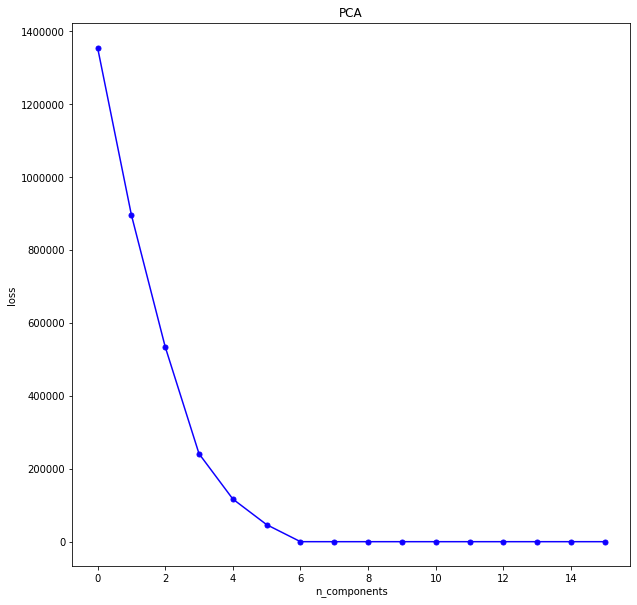

In [22]:
loss = [pca_grid[i][1] for i in range(1,len(data.columns))]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('PCA')
ax.set_xlabel('n_components')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=10, linestyle='-')

In [23]:
pca = PCA(n_components=6)
pca.fit(X)
X_red = pca.transform(X)
X_pred = pca.inverse_transform(X_red)
np.mean(np.mean(np.square(X-X_pred), axis=1), axis=0)

46682.12058408369

-----

In [24]:
def AE():
    model = tf.keras.models.Sequential()
    f1 = tf.keras.layers.Lambda(function=lambda x: (x-mu)/sigma)
    f2 = tf.keras.layers.Dense(units=128,
                               activation='tanh', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f3 = tf.keras.layers.Dense(units=128,
                               activation='tanh', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f4 = tf.keras.layers.Dense(units=6,
                               activation='tanh', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f5 = tf.keras.layers.Dense(units=128,
                               activation='tanh', 
                               kernel_initializer='he_uniform',
                               bias_initializer='zeros')
    f6 = tf.keras.layers.Dense(units=128,
                               activation='tanh', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f7 = tf.keras.layers.Dense(units=X.shape[1], 
                               activation='linear',
                               kernel_initializer='he_uniform',
                               bias_initializer='zeros')
    f8 = tf.keras.layers.Lambda(function=lambda x: x*sigma+mu)
    x0 = tf.keras.Input(shape=(X.shape[1]))
    x1 = f1(x0)
    x2 = f2(x1)
    x3 = f3(x2)
    x4 = f4(x3)
    x5 = f5(x4)
    x6 = f6(x5)
    x7 = f7(x6)
    x8 = f8(x7)
    ae = tf.keras.Model(x0, x8) 
    y0 = tf.keras.Input(shape=(X.shape[1]))
    y1 = f1(y0)
    y2 = f2(y1)
    y3 = f3(y2)
    y4 = f4(y3)
    encoder = tf.keras.Model(y0, y4)
    z0 = tf.keras.Input(shape=(6))
    z1 = f5(z0)
    z2 = f6(z1)
    z3 = f7(z2)
    z4 = f8(z3)
    decoder = tf.keras.Model(z0, z4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    ae.compile(loss='mse', optimizer=optimizer)
    ae.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.00001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    ae.fit(X, X, epochs=1000, batch_size=64, callbacks=[callback1, callback2])
    return ae, encoder, decoder

In [27]:
ae, encoder, decoder = AE()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 17)]              0         
_________________________________________________________________
lambda_6 (Lambda)            (None, 17)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               2304      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_21 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_22 (Dense)             (None, 128)               1651

8950/8950 [==============================] - 0s 26us/sample - loss: 47164.3722
Epoch 73/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 39229.6433
Epoch 74/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 36920.9881
Epoch 75/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 34484.6418
Epoch 76/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 36472.7984
Epoch 77/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 35033.9359
Epoch 78/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 34066.4836
Epoch 79/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 39067.2172
Epoch 80/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 36610.7110
Epoch 81/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 43951.8548
Epoch 82/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 39

8950/8950 [==============================] - 0s 25us/sample - loss: 22378.7169
Epoch 160/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 27624.7024
Epoch 161/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 26414.6927
Epoch 162/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 23186.0543
Epoch 163/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 24267.9675
Epoch 164/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 57200.6699
Epoch 165/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 41917.3153
Epoch 166/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 30329.7520
Epoch 167/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 19965.9184
Epoch 168/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 15280.4051
Epoch 169/1000
8950/8950 [==============================] - 0s 25us/sample 

8950/8950 [==============================] - 0s 25us/sample - loss: 17930.5442
Epoch 247/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 19844.0657
Epoch 248/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 18115.9721
Epoch 249/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 14934.8880
Epoch 250/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 9416.1780
Epoch 251/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 7311.0313
Epoch 252/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 8680.3608
Epoch 253/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 7594.9013
Epoch 254/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 6874.3565
Epoch 255/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 6488.4833
Epoch 256/1000
8950/8950 [==============================] - 0s 27us/sample - loss

8950/8950 [==============================] - 0s 26us/sample - loss: 87323.9667
Epoch 334/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 49093.4112
Epoch 335/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 43525.5967
Epoch 336/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 15990.0341
Epoch 337/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 11585.8581
Epoch 338/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 10684.3277
Epoch 339/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 8086.2145
Epoch 340/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 6869.2029
Epoch 341/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 6133.2041
Epoch 342/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 5935.9187
Epoch 343/1000
8950/8950 [==============================] - 0s 25us/sample - lo

Epoch 421/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 4395.3358
Epoch 422/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 4218.1554
Epoch 423/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 4396.1509
Epoch 424/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 4408.5705
Epoch 425/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 4383.9242
Epoch 426/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5075.0295
Epoch 427/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5716.8126
Epoch 428/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 6035.7280
Epoch 429/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 6842.4384
Epoch 430/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 6022.6439
Epoch 431/1000
8950/8950 [==============================] - 0s 25us/sa

Epoch 509/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 9399.7640
Epoch 510/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 7834.1984
Epoch 511/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5862.1030
Epoch 512/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 5725.2514
Epoch 513/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5663.5417
Epoch 514/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 5347.2633
Epoch 515/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 5376.1430
Epoch 516/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 11687.7899
Epoch 517/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 17848.8798
Epoch 518/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 20686.6453
Epoch 519/1000
8950/8950 [==============================] - 0s 24us

8950/8950 [==============================] - 0s 25us/sample - loss: 2340.3804
Epoch 598/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2326.3762
Epoch 599/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2305.6774
Epoch 600/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 2310.7252
Epoch 601/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 2293.3176
Epoch 602/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2281.6274
Epoch 603/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2286.6198
Epoch 604/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 2281.6329
Epoch 605/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 2278.3025
Epoch 606/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2281.0239
Epoch 607/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 22

8950/8950 [==============================] - 0s 25us/sample - loss: 2070.4579
Epoch 686/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2078.3577
Epoch 687/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 2056.4633
Epoch 688/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 2066.1219
Epoch 689/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 2023.5656
Epoch 690/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 2048.1553
Epoch 691/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 2071.9491
Epoch 692/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2059.9410
Epoch 693/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 2058.6599
Epoch 694/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2012.5658
Epoch 695/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 20

8950/8950 [==============================] - 0s 33us/sample - loss: 1908.9709
Epoch 774/1000
8950/8950 [==============================] - 0s 31us/sample - loss: 1946.7238
Epoch 775/1000
8950/8950 [==============================] - 0s 42us/sample - loss: 1909.7667
Epoch 776/1000
8950/8950 [==============================] - 0s 33us/sample - loss: 1923.9952
Epoch 777/1000
8950/8950 [==============================] - 0s 43us/sample - loss: 1905.2531
Epoch 778/1000
8950/8950 [==============================] - 0s 49us/sample - loss: 1940.4287
Epoch 779/1000
8950/8950 [==============================] - 0s 31us/sample - loss: 1907.4096s - loss: 1929.20
Epoch 780/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 1967.8477
Epoch 781/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 1949.0520
Epoch 782/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 1934.9563
Epoch 783/1000
8950/8950 [==============================] - 0s 27us/

8950/8950 [==============================] - 0s 26us/sample - loss: 1827.6451
Epoch 862/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1846.6365
Epoch 863/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1863.6664
Epoch 864/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 1869.4722
Epoch 865/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1832.8849
Epoch 866/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1830.6182
Epoch 867/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 1834.0147
Epoch 868/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1875.4559
Epoch 869/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1831.5287
Epoch 870/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 1850.6724
Epoch 871/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 18

8950/8950 [==============================] - 0s 28us/sample - loss: 1783.6101
Epoch 950/1000
8950/8950 [==============================] - 0s 31us/sample - loss: 1783.4419
Epoch 951/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 1744.9622
Epoch 952/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 1823.5683
Epoch 953/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1783.4551
Epoch 954/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 1768.3037
Epoch 955/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1766.3293
Epoch 956/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 1770.4236
Epoch 957/1000
8950/8950 [==============================] - 0s 24us/sample - loss: 1772.4611
Epoch 958/1000
8950/8950 [==============================] - 0s 41us/sample - loss: 1759.8003
Epoch 959/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 17

In [28]:
ae.evaluate(X,X)

8950/8950 [==============================] - 0s 33us/sample - loss: 1750.5422


1750.5421588168863

In [29]:
X_red = encoder.predict(X)

-----

In [30]:
kmeans_grid = {}
for i in range(1,20):
    n_clusters = 5*i
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_red)
    X_clusters = kmeans.predict(X_red)
    X_centroids = kmeans.cluster_centers_[X_clusters,:]
    loss = np.mean(np.sum(np.square(X_red-X_centroids), axis=1))
    kmeans_grid[n_clusters] = [kmeans, loss]

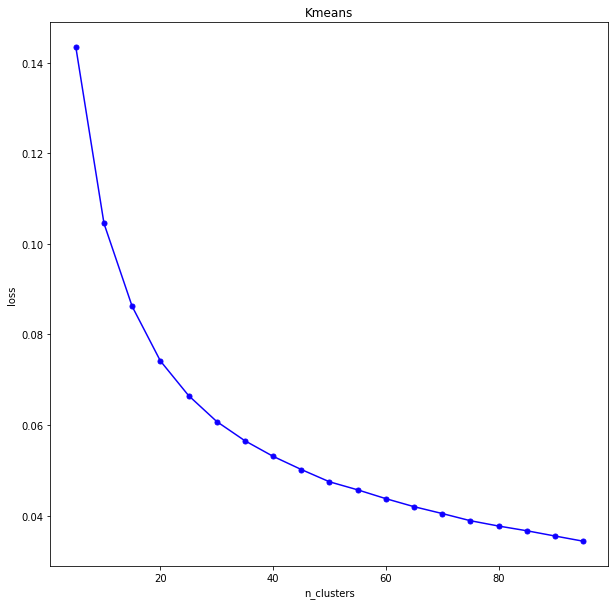

In [33]:
loss = [kmeans_grid[5*i][1] for i in range(1,20)]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Kmeans')
ax.set_xlabel('n_clusters')
ax.set_ylabel('loss')
ax.plot(5*np.array(range(1,20)), loss, marker='.', color='#0F00FF', markersize=10, linestyle='-')

-----

In [34]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(X_red)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
data.loc[:,'CLUSTERS'] = kmeans.predict(X_red)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,11
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,10
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,15


In [36]:
data.query('CLUSTERS == 0').iloc[:,:-1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,354.517375,0.695658,314.571764,136.129425,178.958811,530.531400,0.429856,0.107821,0.339889,0.073230,1.685523,7.540748,3825.474593,489.323993,221.192730,0.198235,11.588686
std,607.468476,0.320888,352.456202,227.393854,220.682733,1233.016929,0.355620,0.199177,0.357470,0.155556,4.298914,8.623664,1100.733502,469.342366,206.145808,0.314452,1.241689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,0.000000,0.037744,0.000000,6.000000
25%,15.451065,0.454545,64.500000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,3000.000000,182.010953,113.034784,0.000000,12.000000
50%,55.584590,0.818182,202.000000,0.000000,99.190000,0.000000,0.333333,0.000000,0.250000,0.000000,0.000000,5.000000,4000.000000,350.773984,167.442242,0.000000,12.000000
75%,387.517133,1.000000,440.835000,201.590000,289.890000,206.002983,0.750000,0.100000,0.583333,0.083333,1.000000,11.000000,4500.000000,635.806476,291.172070,0.300000,12.000000
max,3770.560441,1.000000,2014.840000,1211.900000,1338.710000,9577.424422,1.000000,1.000000,1.000000,1.000000,46.000000,80.000000,9000.000000,3331.674163,2022.852618,1.000000,12.000000


In [37]:
data.query('CLUSTERS == 1').iloc[:,:-1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,5118.306513,0.990278,502.432324,326.739787,175.766567,1919.674504,0.297084,0.158013,0.185723,0.302873,7.283582,9.449893,6313.584674,2490.957617,1921.036642,0.008062,11.844350
std,1641.904640,0.050199,858.276461,608.045636,406.197773,1647.253518,0.361919,0.256863,0.321568,0.236611,7.955443,21.384258,1821.234557,1964.356841,1133.345115,0.027011,0.656391
min,1250.526799,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2200.000000,0.000000,312.343947,0.000000,6.000000
25%,4059.211725,1.000000,0.000000,0.000000,0.000000,396.233514,0.000000,0.000000,0.000000,0.090909,2.000000,0.000000,5000.000000,1261.781799,1225.908506,0.000000,12.000000
50%,5049.442457,1.000000,107.330000,0.000000,0.000000,1728.341939,0.083333,0.000000,0.000000,0.250000,5.000000,1.000000,6000.000000,1715.681945,1677.290468,0.000000,12.000000
75%,5975.063353,1.000000,663.000000,369.520000,142.500000,2973.966812,0.583333,0.166667,0.250000,0.416667,10.000000,11.000000,7500.000000,3039.325393,2351.635775,0.000000,12.000000
max,9559.783145,1.000000,5539.680000,4020.330000,2935.890000,8980.648498,1.000000,1.000000,1.000000,1.166667,52.000000,273.000000,12000.000000,11263.921850,9642.502512,0.166667,12.000000


In [38]:
data.query('CLUSTERS == 2').iloc[:,:-1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,3038.161006,0.965714,592.733763,414.002615,178.731148,1694.353378,0.392227,0.230953,0.235286,0.226542,5.236749,9.855124,7534.187279,1775.210619,813.444534,0.019344,11.657244
std,1438.569597,0.125473,717.494799,536.775806,338.091261,1912.273043,0.385732,0.300188,0.344570,0.242276,7.158419,14.335556,1796.213311,1450.755910,420.559972,0.095406,1.082038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3700.000000,0.000000,13.545097,0.000000,6.000000
25%,1995.560069,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,837.533695,503.651680,0.000000,12.000000
50%,2942.013082,1.000000,284.250000,153.955000,0.000000,1010.732692,0.250000,0.083333,0.000000,0.166667,3.000000,4.000000,7500.000000,1247.625587,751.052562,0.000000,12.000000
75%,3946.762967,1.000000,976.017500,715.127500,207.930000,2919.759070,0.801136,0.333333,0.416667,0.333333,8.000000,13.000000,8500.000000,2192.887040,1058.269908,0.000000,12.000000
max,7152.864372,1.000000,3545.560000,2236.680000,1955.080000,9670.775878,1.000000,1.000000,1.000000,1.500000,45.000000,111.000000,13000.000000,7821.035049,2605.968939,1.000000,12.000000
